# 08. Pranjali1049/Salary_Prediction

## Exploratory Data Analysis - Salary_Data.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('08_Salary_Data.csv')

In [3]:
# First 5 rows of the dataset
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
# Last 5 rows of the dataset
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [5]:
# All columns, their counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
# Get statistical info about numerical columns
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Column Analysis

In [7]:
# Get the counts of genders
df['Gender'].value_counts()

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64

In [8]:
# Observe the counts of each education level
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [9]:
# This needs to be clean, so create a new column for this purpose
def clean_education_level(edu):
    if type(edu) == float:    return 'Unknown'
    if 'bachelor' in edu.lower():   return 'Bachelor'
    elif 'master' in edu.lower():   return 'Master'
    elif 'phd' in edu.lower():      return 'PhD'
    else:   return edu
df['Education Level Clean'] = df['Education Level'].apply(lambda x: clean_education_level(x))

In [10]:
# The actual counts of each education level after the text processing
df['Education Level Clean'].value_counts()

Bachelor       3023
Master         1861
PhD            1369
High School     448
Unknown           3
Name: Education Level Clean, dtype: int64

In [11]:
print("{} different titles available".format(df['Job Title'].nunique()))
print("\n#### MOST FREQUENT JOB TITLES ####")
print(df['Job Title'].value_counts()[:20])

193 different titles available

#### MOST FREQUENT JOB TITLES ####
Software Engineer            518
Data Scientist               453
Software Engineer Manager    376
Data Analyst                 363
Senior Project Engineer      318
Product Manager              313
Full Stack Engineer          309
Marketing Manager            255
Back end Developer           244
Senior Software Engineer     244
Front end Developer          241
Marketing Coordinator        158
Junior Sales Associate       142
Financial Manager            134
Marketing Analyst            132
Software Developer           125
Operations Manager           114
Human Resources Manager      104
Director of Marketing         88
Web Developer                 87
Name: Job Title, dtype: int64


In [12]:
cnt_software_eng = 0;  cnt_data_sci = 0;  cnt_data_anly = 0;  cnt_proj_eng = 0;  cnt_prod_man = 0;
cnt_fs_eng = 0;  cnt_marketing = 0;  cnt_backend_dev = 0;  cnt_frontend_dev = 0;  cnt_sales = 0;
cnt_finance_man = 0;  cnt_oprt_man = 0;  cnt_hr_man = 0;  cnt_web_dev = 0;  cnt_other = 0
for job in df['Job Title']:
    if type(job) == float:  continue
    job = job.lower()
    if 'software engineer' in job or 'software developer' in job:   cnt_software_eng += 1
    elif 'data scientist' in job:   cnt_data_sci += 1
    elif 'data analyst' in job:   cnt_data_anly += 1
    elif 'project engineer' in job:   cnt_proj_eng += 1
    elif 'product manager' in job:   cnt_prod_man += 1
    elif 'full stack' in job or 'fullstack' in job:   cnt_fs_eng += 1
    elif 'marketing' in job:   cnt_marketing += 1
    elif 'back end' in job or 'backend' in job:   cnt_backend_dev += 1
    elif 'front end' in job or 'frontend' in job:   cnt_frontend_dev += 1
    elif 'sales' in job:   cnt_sales += 1
    elif 'financial' in job:   cnt_finance_man += 1
    elif 'operation' in job:   cnt_oprt_man += 1
    elif 'human resource' in job:   cnt_hr_man += 1
    elif 'web developer' in job:   cnt_web_dev += 1
    else:   cnt_other += 1
print("#### ACTUAL COUNTS OF JOB TITLES ####")
print("{:4} Software Engineers".format(cnt_software_eng))
print("{:4} Data Scientists".format(cnt_data_sci))
print("{:4} Data Analysts".format(cnt_data_anly))
print("{:4} Project Engineers".format(cnt_proj_eng))
print("{:4} Product Managers".format(cnt_prod_man))
print("{:4} Full Stack Engineers/Developers".format(cnt_fs_eng))
print("{:4} Marketing Analysts/Managers".format(cnt_marketing))
print("{:4} Backend Developers".format(cnt_backend_dev))
print("{:4} Frontend Developers".format(cnt_frontend_dev))
print("{:4} Sales Associates/Representatives/Managers/Directors".format(cnt_sales))
print("{:4} Financial Analysts/Managers".format(cnt_finance_man))
print("{:4} Operations Analysts/Managers/Directors".format(cnt_oprt_man))
print("{:4} Human Resource Coordinators/Managers".format(cnt_hr_man))
print("{:4} Web Developers".format(cnt_web_dev))
print("{:4} OTHER".format(cnt_other))

#### ACTUAL COUNTS OF JOB TITLES ####
1375 Software Engineers
 515 Data Scientists
 391 Data Analysts
 319 Project Engineers
 323 Product Managers
 309 Full Stack Engineers/Developers
1000 Marketing Analysts/Managers
 244 Backend Developers
 272 Frontend Developers
 454 Sales Associates/Representatives/Managers/Directors
 197 Financial Analysts/Managers
 150 Operations Analysts/Managers/Directors
 206 Human Resource Coordinators/Managers
 129 Web Developers
 818 OTHER


## Visualizations

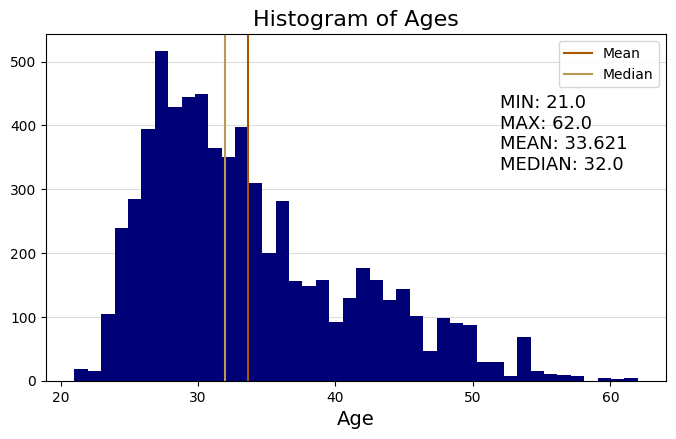

In [13]:
plt.figure(figsize=(8,4.5))
age = df['Age']
plt.hist(age, bins=42, color='#000077', zorder=2)
plt.text(52, 330, "MIN: {}\nMAX: {}\nMEAN: {:.3f}\nMEDIAN: {}".format(
    age.min(), age.max(), age.mean(), age.median()), fontsize=13)
plt.axvline(age.mean(), color='#aa5500', label='Mean')
plt.axvline(age.median(), color='#bb9955', label='Median')
plt.title('Histogram of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.legend()
plt.show()

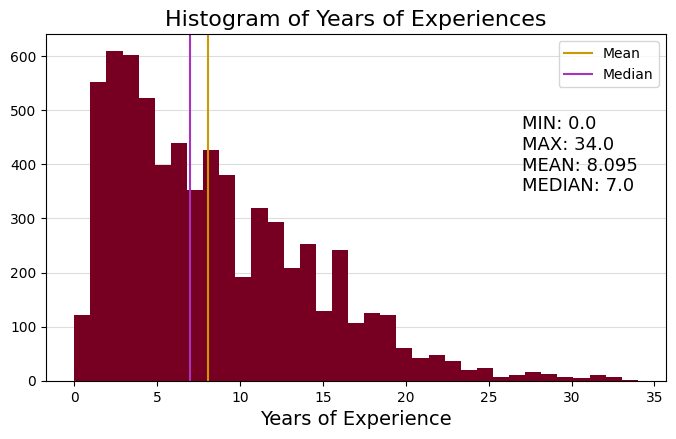

In [14]:
plt.figure(figsize=(8,4.5))
exp = df['Years of Experience']
plt.hist(exp, bins=35, color='#770022', zorder=2)
plt.text(27, 350, "MIN: {}\nMAX: {}\nMEAN: {:.3f}\nMEDIAN: {}".format(
    exp.min(), exp.max(), exp.mean(), exp.median()), fontsize=13)
plt.title('Histogram of Years of Experiences', fontsize=16)
plt.xlabel('Years of Experience', fontsize=14)
plt.axvline(exp.mean(), color='#cc9900', label='Mean')
plt.axvline(exp.median(), color='#aa33be', label='Median')
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.legend()
plt.show()

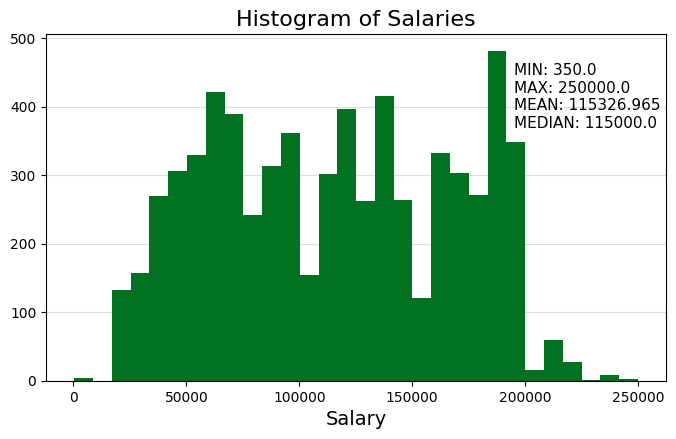

In [15]:
plt.figure(figsize=(8,4.5))
salary = df['Salary']
plt.hist(salary, bins=30, color='#007222', zorder=2)
plt.text(195000, 370, "MIN: {}\nMAX: {}\nMEAN: {:.3f}\nMEDIAN: {}".format(
    salary.min(), salary.max(), salary.mean(), salary.median()), fontsize=11)
plt.title('Histogram of Salaries', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

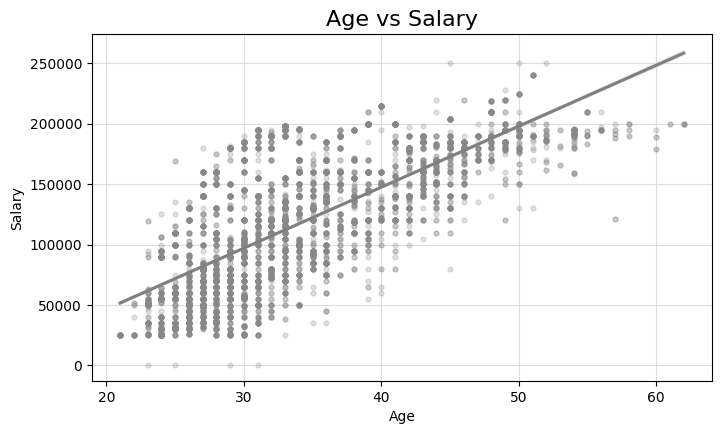

In [16]:
plt.figure(figsize=(8,4.5))
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'#888888', 's':12, 'alpha':0.25, 'zorder':2}, line_kws={'color':'gray'})
plt.title('Age vs Salary', fontsize=16)
plt.grid(color='#dddddd', zorder=1)
plt.show()

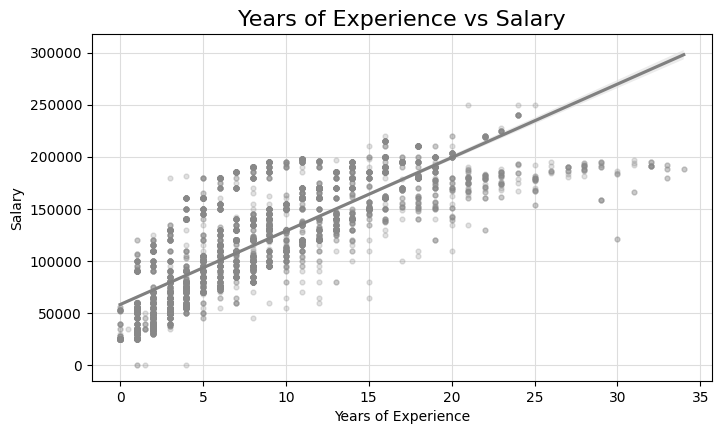

In [17]:
plt.figure(figsize=(8,4.5))
sns.regplot(x='Years of Experience',y='Salary',data=df, 
            scatter_kws={'color':'#888888', 's':12, 'alpha':0.25, 'zorder':2}, line_kws={'color':'gray'})
plt.title('Years of Experience vs Salary', fontsize=16)
plt.grid(color='#dddddd', zorder=1)
plt.show()

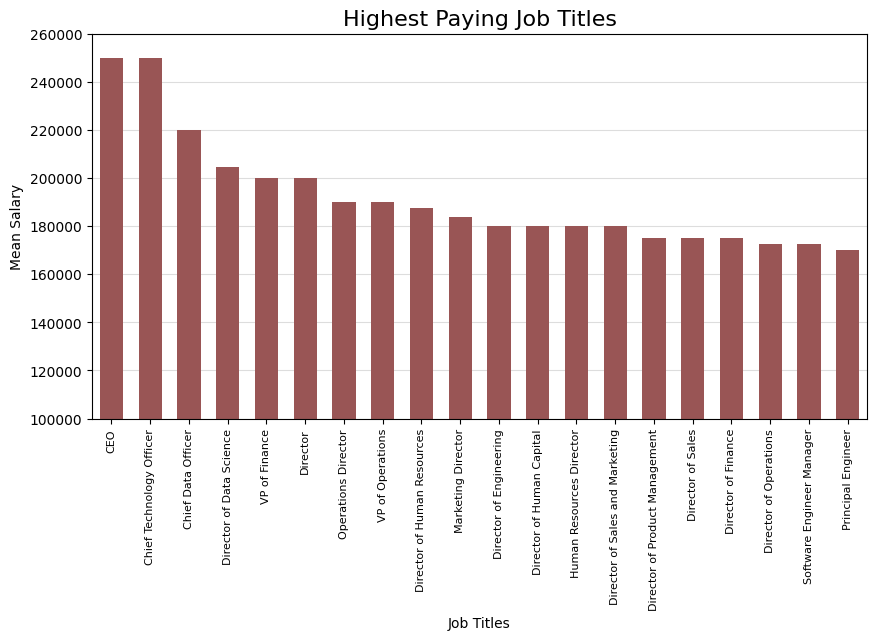

In [18]:
job_salary_mean = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=False)[:20]
plt.figure(figsize=(10,5))
plt.axis([-0.5,19.5,100000,260000])
plt.bar(job_salary_mean.index, job_salary_mean, width=0.6, color='#995555', zorder=2)
plt.title('Highest Paying Job Titles', fontsize=16)
plt.xlabel('Job Titles')
plt.ylabel('Mean Salary')
plt.xticks(rotation=90, fontsize=8)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

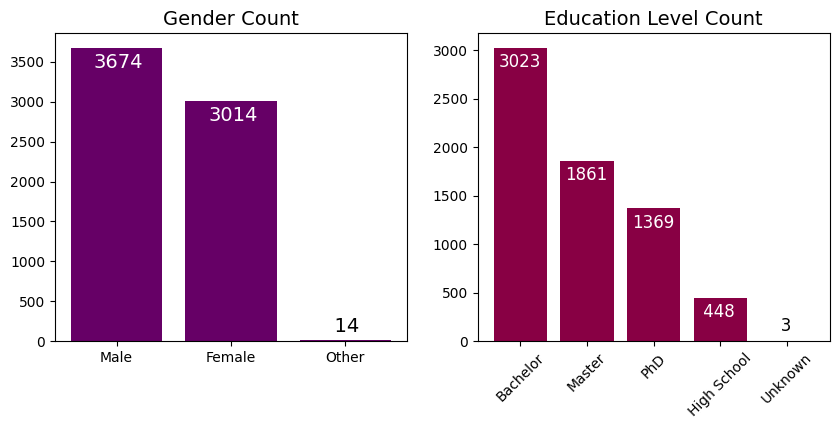

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
gender_cnt = df['Gender'].value_counts()
plt.bar(gender_cnt.index, gender_cnt, color='#660066')
for i in range(len(gender_cnt)):
    if gender_cnt[i] > 100:
        plt.text(i-0.2, gender_cnt[i]-250, "{:4}".format(gender_cnt[i]), color='white', fontsize=14)
    else:  plt.text(i-0.2, gender_cnt[i]+100, "{:4}".format(gender_cnt[i]), color='black', fontsize=14)
plt.title('Gender Count', fontsize=14)
plt.subplot(1,2,2)
education_cnt = df['Education Level Clean'].value_counts()
plt.bar(education_cnt.index, education_cnt, color='#880044')
for i in range(len(education_cnt)):
    if education_cnt[i] > 400:
        plt.text(i-0.33, education_cnt[i]-200, "{:4}".format(education_cnt[i]), color='white', fontsize=12)
    else:  plt.text(i-0.33, education_cnt[i]+100, "{:4}".format(education_cnt[i]), color='black', fontsize=12)
plt.title('Education Level Count', fontsize=14)
plt.xticks(rotation=45)
plt.show()

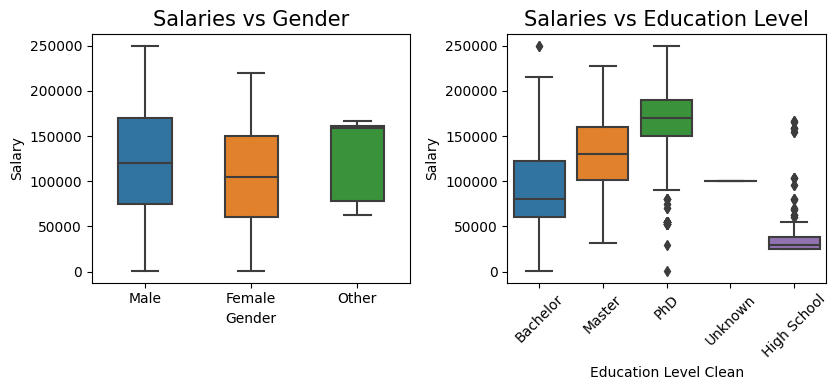

In [20]:
plt.figure(figsize=(8.5,4))
plt.subplot(1,2,1)
sns.boxplot(x='Gender', y='Salary', width=0.5, data=df)
plt.title("Salaries vs Gender", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='Education Level Clean', y='Salary', data=df)
plt.title("Salaries vs Education Level", fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

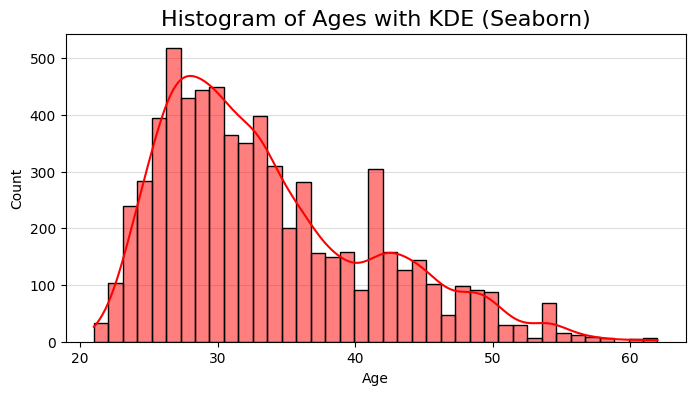

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], color='red', kde=True, zorder=2)
plt.title("Histogram of Ages with KDE (Seaborn)", fontsize=16)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

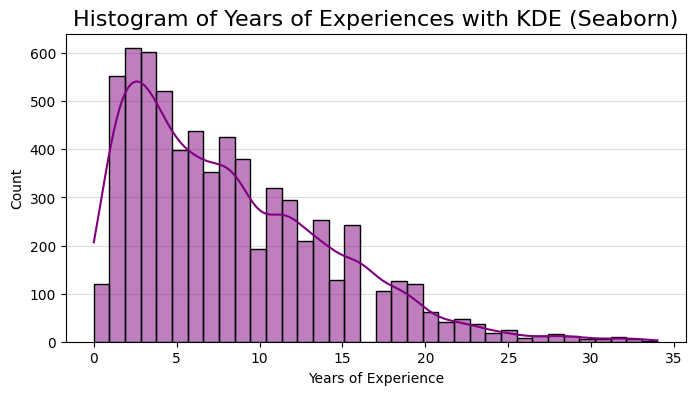

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df['Years of Experience'], color='purple', kde=True, zorder=2)
plt.title("Histogram of Years of Experiences with KDE (Seaborn)", fontsize=16)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()

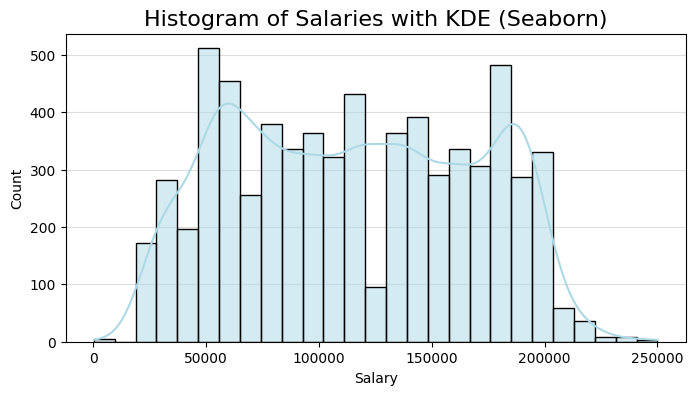

In [23]:
plt.figure(figsize=(8,4))
sns.histplot(df['Salary'], color='lightblue', kde=True, zorder=2)
plt.title("Histogram of Salaries with KDE (Seaborn)", fontsize=16)
plt.grid(color='#dddddd', axis='y', zorder=1)
plt.show()